In [1]:
from schnetpack.datasets import QM9

qm9data = QM9(
    './qm9.db', 
    batch_size=10,
    num_train=110000,
    num_val=10000,
)
qm9data.prepare_data()
qm9data.setup()


In [2]:
print("Available properties:")
for p in qm9data.dataset.available_properties:
    print('-', p)

Available properties:
- rotational_constant_A
- rotational_constant_B
- rotational_constant_C
- dipole_moment
- isotropic_polarizability
- homo
- lumo
- gap
- electronic_spatial_extent
- zpve
- energy_U0
- energy_U
- enthalpy_H
- free_energy
- heat_capacity


In [3]:
# data sample
example = qm9data.dataset[0]
print('Properties:')

for k, v in example.items():
    print('-', k, ':', v)


Properties:
- _idx : tensor([0])
- rotational_constant_A : tensor([157.7118], dtype=torch.float64)
- rotational_constant_B : tensor([157.7100], dtype=torch.float64)
- rotational_constant_C : tensor([157.7070], dtype=torch.float64)
- dipole_moment : tensor([0.], dtype=torch.float64)
- isotropic_polarizability : tensor([13.2100], dtype=torch.float64)
- homo : tensor([-0.3877], dtype=torch.float64)
- lumo : tensor([0.1171], dtype=torch.float64)
- gap : tensor([0.5048], dtype=torch.float64)
- electronic_spatial_extent : tensor([35.3641], dtype=torch.float64)
- zpve : tensor([0.0447], dtype=torch.float64)
- energy_U0 : tensor([-40.4789], dtype=torch.float64)
- energy_U : tensor([-40.4761], dtype=torch.float64)
- enthalpy_H : tensor([-40.4751], dtype=torch.float64)
- free_energy : tensor([-40.4986], dtype=torch.float64)
- heat_capacity : tensor([6.4690], dtype=torch.float64)
- _n_atoms : tensor([5])
- _atomic_numbers : tensor([6, 1, 1, 1, 1])
- _positions : tensor([[-1.2698e-02,  1.0858e+00,

In [4]:
# Create a correlation matrix between all properties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 

Transform the data into dataframe that can be used for correlation analysis. It is not clear if there is a more efficient way, so brute force is used here. Sorry.

In [5]:
# get all properties
property_titles = qm9data.dataset.available_properties

# convert to dataframe
dataset_df = pd.DataFrame()
N = len(qm9data.dataset)
progress_bar = tqdm(total=N)

rows = []

for d in qm9data.dataset:
    row = {}
    for k, v in d.items():
        if k in property_titles:
            row[k] = v.item()
    
    row = pd.Series(row)
    rows.append(row)

    progress_bar.update(1)

    if progress_bar.n > N-100:
        # I have to break here, because in built in iterator is broken
        break

dataset_df = pd.DataFrame(rows)
progress_bar.close()

100%|█████████▉| 133786/133885 [02:45<00:00, 808.67it/s]


In [6]:
# dataset_df = pd.DataFrame(rows)
print(dataset_df.columns)

Index(['rotational_constant_A', 'rotational_constant_B',
       'rotational_constant_C', 'dipole_moment', 'isotropic_polarizability',
       'homo', 'lumo', 'gap', 'electronic_spatial_extent', 'zpve', 'energy_U0',
       'energy_U', 'enthalpy_H', 'free_energy', 'heat_capacity'],
      dtype='object')


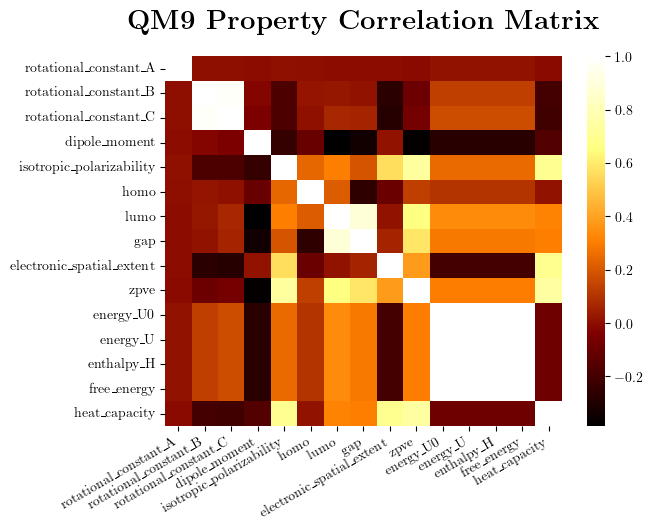

In [35]:
# print correlation matrix
corr = dataset_df.corr()
plt.rc('text', usetex=True)
plt.rc('font', family='serif') 
ax = sns.heatmap(corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap='afmhot',
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)

# add title and show
plt.title(r"\textbf{QM9 Property Correlation Matrix}", fontsize=20, pad=20)

# save all the image not the cropped one
plt.savefig('./figures/qm9-property-correlation.pdf', bbox_inches='tight')
plt.show()

In [11]:
dataset_df

,rotational_constant_A,rotational_constant_B,rotational_constant_C,dipole_moment,isotropic_polarizability,homo,lumo,gap,electronic_spatial_extent,zpve,energy_U0,energy_U,enthalpy_H,free_energy,heat_capacity
0,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469
1,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316
2,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002
3,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574
4,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133781,3.59983,0.822570,0.766120,1.8980,58.56,-0.2617,0.0105,0.2722,1450.8316,0.106981,-585.442899,-585.433320,-585.432376,-585.479080,31.925
133782,4.49757,0.540310,0.530480,3.0914,59.65,-0.2855,0.0107,0.2961,1961.5030,0.095373,-568.152171,-568.142633,-568.141689,-568.188901,32.002
133783,4.38421,0.545470,0.535550,3.4458,67.25,-0.2876,0.0147,0.3023,2040.4332,0.118828,-532.232534,-532.222773,-532.221829,-532.269551,33.291
133784,4.57655,0.557710,0.548410,3.6756,60.62,-0.2744,-0.0053,0.2691,1947.0059,0.094812,-568.136947,-568.127426,-568.126482,-568.173885,31.497
